In [8]:
%matplotlib notebook

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import fits
import pandas as pd
import specreduce

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

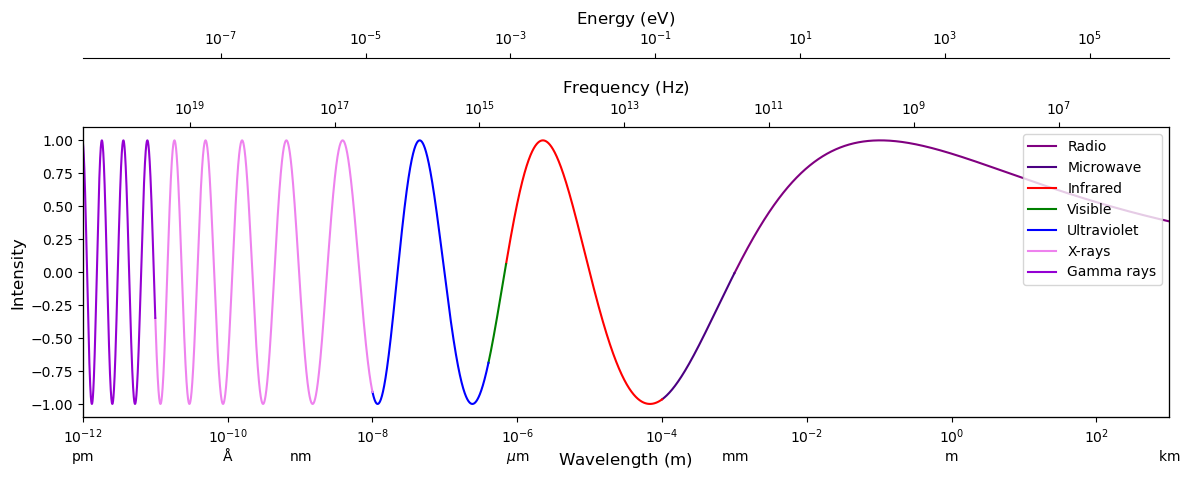

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Constants
h = 6.626e-34  # Planck's constant (Joule*second)
c = 3.0e8      # Speed of light (meters/second)
e = 1.602e-19  # Elementary charge (Coulombs) for energy conversion

# Wavelength range (in meters)
wavelengths = np.logspace(-12, 3, 100000)  # from 1 pm to 1 km

# Corresponding frequency (in Hz)
frequencies = c / wavelengths

# Corresponding energy (in eV)
energy = (h * c / wavelengths) / e

# Create a conceptual sine wave (non-realistic, gradually shrinking for visual clarity)
# The sine wave compresses gradually along the x-axis for conceptual visualization.
intensity = np.sin(np.power(1/(wavelengths*1e5), 0.15) * 2 * np.pi)  # Conceptual shrinkage along x-axis

# Create a figure with reduced height
fig, ax1 = plt.subplots(figsize=(12, 5))

# Wavelength axis (logarithmic scale)
ax1.set_xscale('log')
ax1.set_xlim(wavelengths.min(), wavelengths.max())
ax1.set_xlabel(r'Wavelength $(\mathrm{m})$', fontsize=12)
ax1.set_ylabel(r'Intensity', fontsize=12)

# Frequency axis (logarithmic scale, twin to the wavelength axis)
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(frequencies.max(), frequencies.min())  # Frequency decreases as wavelength increases
ax2.set_xlabel(r'Frequency $(\mathrm{Hz})$', fontsize=12)

# Energy axis (logarithmic scale, another twin axis)
ax3 = ax1.twiny()
ax3.spines['top'].set_position(('outward', 50))  # Offset the axis
ax3.set_xscale('log')
ax3.set_xlim(energy.min(), energy.max())
ax3.set_xlabel(r'Energy $(\mathrm{eV})$', fontsize=12)

# Format tick labels as exponential
def format_exp(x, pos):
    return r'$10^{{{}}}$'.format(int(np.log10(x)))

ax1.xaxis.set_major_formatter(FuncFormatter(format_exp))
ax2.xaxis.set_major_formatter(FuncFormatter(format_exp))
ax3.xaxis.set_major_formatter(FuncFormatter(format_exp))

# Wavelength SI Units in LaTeX
si_labels = [(1e3, r'\mathrm{km}'), (1, r'\mathrm{m}'), (1e-3, r'\mathrm{mm}'), 
             (1e-6, r'\mu\mathrm{m}'), (1e-9, r'\mathrm{nm}'), (1e-10, r'\mathrm{\AA}'), (1e-12, r'\mathrm{pm}')]
for pos, label in si_labels:
    ax1.text(pos, -0.15, f'${label}$', transform=ax1.get_xaxis_transform(), ha='center', fontsize=10)

# Label the regions of the electromagnetic spectrum with a color-coded conceptual curve
regions = [
    (1e-3, 1e3, 'Radio', 'purple'),
    (1e-4, 1e-3, 'Microwave', 'indigo'),
    (7e-7, 1e-4, 'Infrared', 'red'),
    (4e-7, 7e-7, 'Visible', 'green'),
    (1e-8, 4e-7, 'Ultraviolet', 'blue'),
    (1e-11, 1e-8, 'X-rays', 'violet'),
    (1e-12, 1e-11, 'Gamma rays', 'darkviolet')
]

# Plot the conceptual intensity curve with color changes in each region
for start, end, label, color in regions:
    mask = (wavelengths >= start) & (wavelengths <= end)
    ax1.plot(wavelengths[mask], intensity[mask], color=color, label=label)

# Add legend
ax1.legend(loc='upper right')

# Adjust layout to prevent labels from going outside
plt.tight_layout()
plt.savefig('electromagnetic_spectrum_conceptual_wavelength_curve.png')
plt.show()

# Save the plot



# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

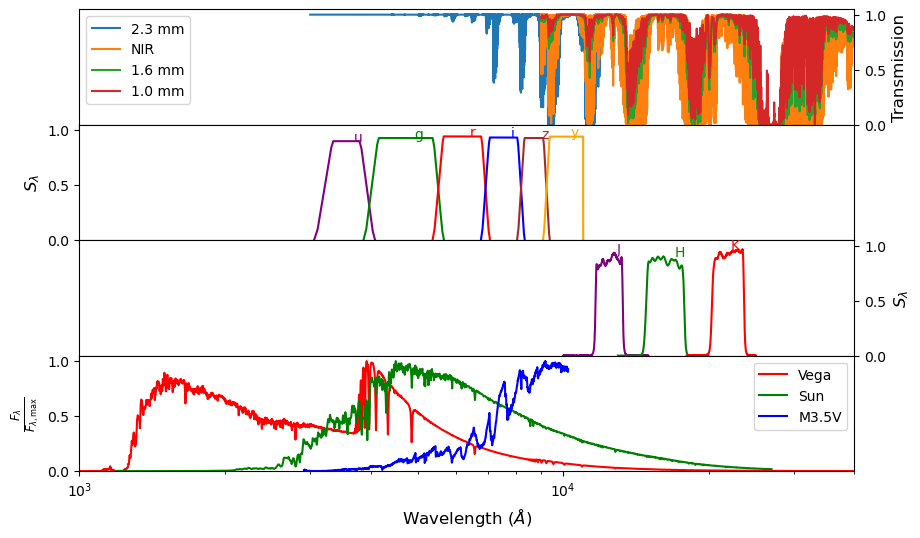

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

# Create the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

# Panel 1
trans_23 = np.loadtxt('./data/2.3mm_pwv_transmission.txt', delimiter=',')
trans_nir = np.loadtxt('./data/NIR.txt')
trans_nir[:, 0] *= 1e4
trans_16 = np.loadtxt('./data/1.6mm_pwv_transmission.txt')
trans_16[:, 0] *= 1e4
trans_10 = np.loadtxt('./data/1.0mm_pwv_transmission.txt')
trans_10[:, 0] *= 1e4

axes[0].plot(trans_23[:, 0], trans_23[:, 1], label='2.3 mm')
axes[0].plot(trans_nir[:, 0], trans_nir[:, 1], label='NIR')
axes[0].plot(trans_16[:, 0], trans_16[:, 1], label='1.6 mm')
axes[0].plot(trans_10[:, 0], trans_10[:, 1], label='1.0 mm')
axes[0].legend(loc='upper left')
axes[0].yaxis.tick_right()  # Move y-ticks for panel 1 to the right
axes[0].yaxis.set_label_position("right")  # Move the y-label to the right
axes[0].set_ylabel(r'Transmission', fontsize=12)

filters = []

# Panel 2: Plot and annotate filter bands
colors = ['purple', 'green', 'red', 'blue', 'brown', 'orange']
bands = ['u', 'g', 'r', 'i', 'z', 'y']
for i, band in enumerate(bands):
    file = pd.read_csv('./data/LSST_LSST.' + band + '_filter.dat', delimiter=' ')
    filt = np.array(file.values)
    filters.append(filt)
    axes[1].plot(filt[:, 0], filt[:, 1], color=colors[i])
    # Annotate band name near the line
    axes[1].annotate(band, xy=(filt[:, 0].mean(), filt[:, 1].max()), xytext=(5, 0),
                     textcoords='offset points', color=colors[i], fontsize=10)

axes[1].yaxis.set_label_position("left")  # Ensure y-label stays on the left
axes[1].set_ylabel(r'$S_\lambda$', fontsize=12)

# Panel 3: Plot and annotate near the lines
bands = ['J', 'H', 'K']
for i, band in enumerate(bands):
    filt = np.loadtxt('./data/' + band + '_HK.txt')[::-1]
    filt[:, 0] *= 1e4
    filt[:, 1] /= 100
    filters.append(filt)
    axes[2].plot(filt[:, 0], filt[:, 1], color=colors[i])
    # Annotate band name near the line
    axes[2].annotate(band, xy=(filt[:, 0].mean(), filt[:, 1].max()), xytext=(5, 0),
                     textcoords='offset points', color=colors[i], fontsize=10)

axes[2].yaxis.tick_right()  # Move y-ticks for panel 3 to the right
axes[2].yaxis.set_label_position("right")  # Move the y-label to the right
axes[2].set_ylabel(r'$S_\lambda$', fontsize=12)

# Panel 4
colors = ['red', 'green', 'blue']
file_names = [
    './data/alpha_lyr_stis_011.fits',
    './data/sun_reference_stis_002.fits',
    './data/bd11d3759_stis_003.fits',
]
labels = ['Vega', 'Sun', 'M3.5V']
stars = []
for i, filename in enumerate(file_names):
    hdul = fits.open(filename)
    data = hdul[1].data
    flux = data["FLUX"]
    stars.append(np.array([data["WAVELENGTH"], flux]).transpose())
    axes[3].plot(data["WAVELENGTH"], flux / flux.max(), label=labels[i], color=colors[i])
axes[3].legend(loc='upper right')

axes[3].yaxis.set_label_position("left")  # Keep y-label on the left for the 4th panel
axes[3].set_ylabel(r'$\frac{F_\lambda}{F_{\lambda,\mathrm{max}}}$', fontsize=12)

# Set the limits for y-axis for all panels
for ax in axes:
    ax.set_ylim(0, 1.05)

# Set the x-axis label and y-axis labels with LaTeX formatting
axes[3].set_xlim(1000, 40000)
axes[3].set_xscale('log')
axes[3].set_xlabel(r'Wavelength ($\AA$)', fontsize=12)  # x-axis label with Angstrom symbol

# Adjust layout and show plot
plt.subplots_adjust(hspace=0)  # Reduce space between subplots
plt.setp([a.get_xticklabels() for a in axes[:-1]], visible=False)  # Hide x-tick labels on all but the last subplot

plt.show()


# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [5]:
import scipy.integrate as integrate
from scipy.interpolate import CubicSpline

trans = np.concatenate((trans_23,trans_nir), axis = 0)

class MAG():
    vega = stars[0]
    
    def __init__(self, flux, filter, trans = trans):
        self.flux = flux
        self.filter = filter 
        self.trans  = trans
        self.filter = filter
        self.filter[filter<0] = 0
        self.tran = self._sort(trans)
        self.AB = np.ones(filter.shape)
        self.AB[:,0] = self.filter[:,0]
        self.AB[:,1] = self.AB_func(self.AB[:,0])
    
    def AB_func(self,wavelength):
        F_nu = 3.631e-20  # Flux in Jy (3631 Jy in erg/s/cm^2/Hz)
        c = 2.998e18  # Speed of light in Å/s
        
        F_lambda = F_nu * c / (wavelength**2)
        
        return F_lambda
    
    def _sort(self, arr):
        # Sort based on the first column
        arr_sorted = arr[arr[:, 0].argsort()]
        # Find unique values in the first column
        _, unique_indices = np.unique(arr_sorted[:, 0], return_index=True)
        # Keep only the unique rows (strictly increasing x-values)
        return arr_sorted[unique_indices]
    
    def interpolate(self, a, b):
        #mask = np.logical_and(b[:,0]>a[:,0].min(),b[:,0]<a[:,0].max())
        filter_ = np.ones(a.shape)
        filter_[:,0] = a[:,0]
        filter_[:,1] = np.interp(a[:,0], b[:,0], b[:,1], right=0, left=0)
        return filter_
    
    def flux_in_band(self, flux, filter):
        mask = np.logical_and(filter[:,0]>flux[:,0].min(),filter[:,0]<flux[:,0].max())
        filter_f = filter[mask]#self.interpolate(flux, filter)
        trans_f = self.interpolate(filter[mask], self.trans)
        flux_f = self.interpolate(filter[mask], flux)
        #plt.plot(flux_f[:,0], flux_f[:,1])
        #plt.show()

        if not mask.sum():
            return np.nan
        
        norm_flux =  integrate.simps(flux_f[:,1]*filter_f[:,1]*trans_f[:,1]*flux_f[:,0], flux_f[:,0])
        norm = integrate.simps(filter_f[:,1]*trans_f[:,1]*flux_f[:,0])
        if norm_flux:
            return norm_flux/norm
        else:
            return np.nan
    
    '''def flux_in_band(self, flux, filter):
        filter_f = CubicSpline(filter[:,0], filter[:,1])
        flux_f = CubicSpline(flux[:,0], flux[:,1])
        trans_f = CubicSpline(self.trans[:,0], self.trans[:,1])
        
        def f(x):
            return trans_f(x)*filter_f(x)*x
        
        def y(x):
            return flux_f(x)*f(x)
        
        #print(integrate.quad(f,filter[:,0].min(),filter[:,0].max())[0])
        
        return integrate.quad(y,filter[:,0].min(),filter[:,0].max())[0]/integrate.quad(f,filter[:,0].min(),filter[:,0].max())[0]'''
        

    def magnitude(self, mode = 'VEGA'):
        mag = -2.5*np.log10(self.flux_in_band(self.flux, self.filter))
        if mode == 'VEGA':
            mag_vaga = -2.5*np.log10(self.flux_in_band(self.vega, self.filter))
            return mag-mag_vaga
        if mode == 'AB':
            mag_AB = -2.5*np.log10(self.flux_in_band(self.AB, self.filter))
            return mag-mag_AB

data = {
    'Passbands': ['u', 'g', 'r', 'i','z','y', 'J', 'H', 'K'],  # Replace with actual band names
    'Sun (Vega)': [MAG(stars[1],filters[i]).magnitude() for i in range(0,9)],
    'BD-11 3759 (Vega)': [MAG(stars[2],filters[i]).magnitude() for i in range(0,9)],
    'Sun (AB)': [MAG(stars[1],filters[i]).magnitude(mode='AB') for i in range(0,9)],
    'BD-11 3759 (AB)': [MAG(stars[2],filters[i]).magnitude(mode='AB') for i in range(0,9)],
    'Vega (AB)': [MAG(stars[0],filters[i]).magnitude(mode='AB') for i in range(0,9)]
}

df = pd.DataFrame(data)
df

C:\Users\liwen\AppData\Local\Temp\ipykernel_39864\3179148221.py:54: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm_flux =  integrate.simps(flux_f[:,1]*filter_f[:,1]*trans_f[:,1]*flux_f[:,0], flux_f[:,0])
C:\Users\liwen\AppData\Local\Temp\ipykernel_39864\3179148221.py:55: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm = integrate.simps(filter_f[:,1]*trans_f[:,1]*flux_f[:,0])


,Passbands,Sun (Vega),BD-11 3759 (Vega),Sun (AB),BD-11 3759 (AB),Vega (AB)
0,u,-26.011803,14.050917,-25.196331,14.866389,0.815472
1,g,-26.363180,12.185172,-26.470212,12.078140,-0.107033
2,r,-27.077224,10.559653,-26.931587,10.705291,0.145638
3,i,-27.413830,8.817209,-27.040742,9.190297,0.373088
4,z,-27.572767,7.952047,-27.058644,8.466169,0.514122
5,y,-27.667264,7.424601,-27.054185,8.037679,0.613079
6,J,-27.942212,6.676059,-27.010950,7.607320,0.931261
7,H,-28.246928,NaN,-26.878126,NaN,1.368802
8,K,-28.300751,NaN,-26.408069,NaN,1.892683


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!